In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
df = pd.read_csv('ts_data_norm_t0.csv')
df.head()

,subject_id,model,scalar,GM,WM,acc,caudate,thalamus,lv,csf
0,MB5330,GQI,iso,"[0.0, 3.3458601646763273, -4.183197432165719, ...","[0.0, 3.818978581287827, -4.098416038455227, 2...","[0.0, 5.453994837307898, -2.644317433459439, 4...","[0.0, 5.528996248862027, -2.6014880626111117, ...","[0.0, 6.609085471973619, -2.7334005054069896, ...","[0.0, 5.335760402741817, -2.8939958474359466, ...","[0.0, 3.473133371983036, -4.7645928050529305, ..."
1,AG6470,GQI,iso,"[0.0, -3.141444810907699, 3.1017522035535126, ...","[0.0, -2.5088174355892328, 3.3648599490723745,...","[0.0, -1.6857816525244873, 4.328525477753344, ...","[0.0, -1.47130314003672, 1.7695983597069942, 0...","[0.0, -1.0565609462338985, 2.359794323831869, ...","[0.0, -1.7898481735731784, 1.335872125068899, ...","[0.0, -3.1580364134690684, 3.3709377447141833,..."
2,AM5508,GQI,iso,"[0.0, -4.954477064928053, -9.84240577138227, -...","[0.0, -4.670666408618801, -8.842605687970504, ...","[0.0, -5.875027910891259, -8.54846189519246, -...","[0.0, -4.140894835797976, -6.995940818418767, ...","[0.0, -4.748268912258296, -9.457625765769363, ...","[0.0, -4.415757345184775, -7.108271222785209, ...","[0.0, -4.083651359100664, -8.148588767619524, ..."
3,AA5325,GQI,iso,"[0.0, -7.93100228747491, 2.7085570234816307, -...","[0.0, -8.295223002037584, 2.6235001131990137, ...","[0.0, -8.206153595037945, 2.3202481025055186, ...","[0.0, -7.07729923583488, 4.5369765062621505, -...","[0.0, -8.71296533080043, 2.6892375698681077, -...","[0.0, -13.410437774804052, 1.7539667367616032,...","[0.0, -10.041843727020115, 2.5457645428101014,..."
4,KS5471,GQI,iso,"[0.0, 1.4643576757610548, 7.268964766105756, 0...","[0.0, 2.2994472122480185, 7.475210171722729, 1...","[0.0, 1.4288677484136683, 7.888707654884361, 2...","[0.0, 1.608550246731681, 5.602563203068354, -0...","[0.0, 4.5047421291879495, 6.435826926314612, 1...","[0.0, 5.079758152698273, 8.28134045153405, 2.2...","[0.0, 0.4474805612802081, 6.768040856206854, 0..."


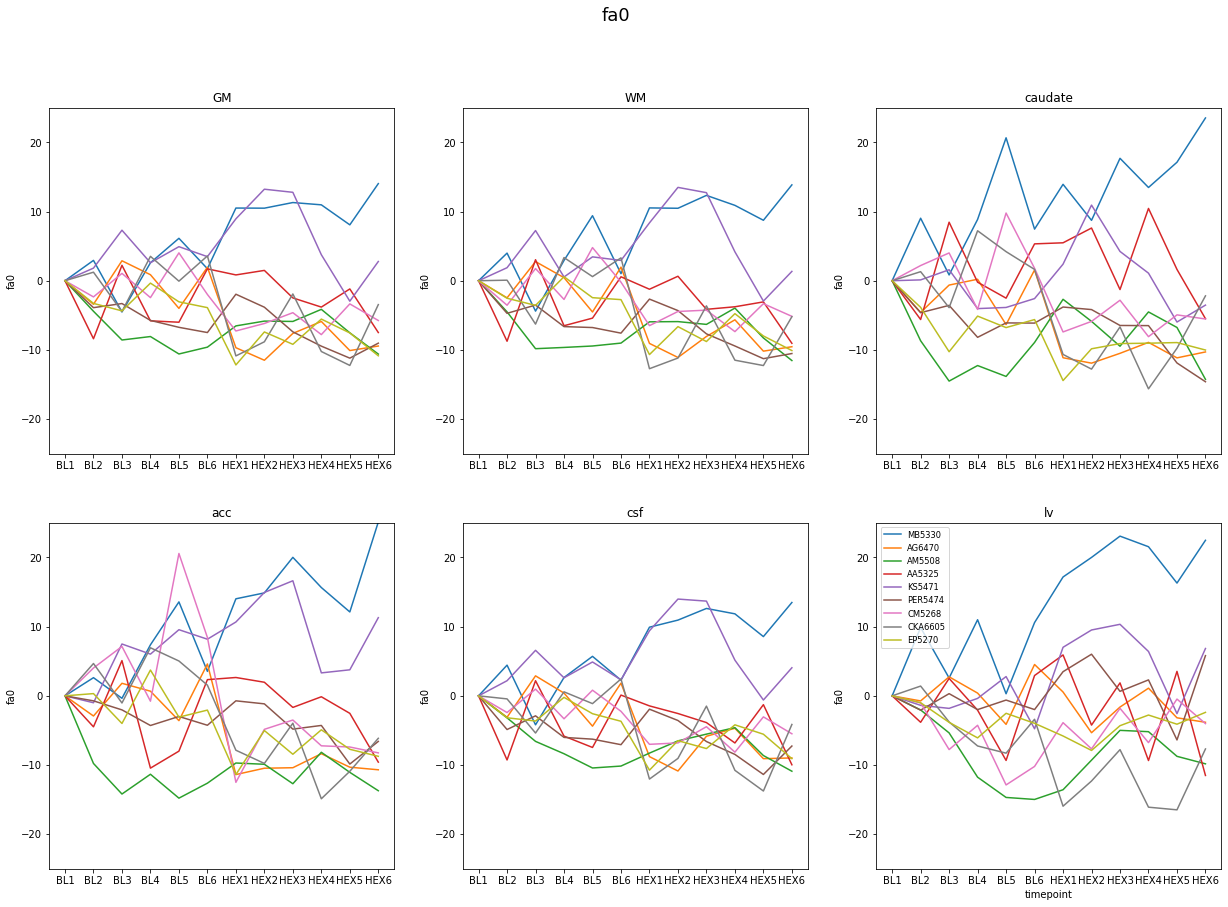

In [14]:
timepoints = ["BL1", "BL2", "BL3", "BL4", "BL5", "BL6", "HEX1", "HEX2", "HEX3", "HEX4", "HEX5", "HEX6"]
fig, axes = plt.subplots(2,3, figsize=(21,14))
# axes[1][2].set_visible(False)

# Choose scalar here
scalar = 'fa0'
scalar_df = df.loc[df.scalar == scalar]

rois = ['GM', 'WM', 'caudate', 'acc', 'csf', 'lv']

for i, ax in enumerate(fig.axes):
    if i < len(rois):
        roi = rois[i]
        if scalar=='rtop':
            ylim=[-10, 10]
        elif scalar=='md':
            ylim=[-10, 10]
        elif scalar=='iso':
            ylim=[-25, 25]
        elif scalar=='ISOVF':
            ylim=[-40, 40]
        elif scalar=='fa0':
            ylim=[-25, 25]
        
        for index, row in scalar_df.iterrows():
            data = row[roi][1:-1].split(',') # convert string to list
            data = [float(i) for i in data]   
            ax.plot(timepoints, data, label=row.subject_id)
            ax.set_ylabel(scalar)
            ax.set_ylim(ylim)
            ax.set_title(roi)

plt.xlabel('timepoint')
plt.legend(loc='upper left', fontsize='small')
fig.suptitle(scalar, fontsize=18)
fname="figs_norm_t0/{}_timeseries.png".format(scalar)
plt.savefig(fname, facecolor='white', edgecolor='none')
plt.show()